<a href="https://colab.research.google.com/github/Siddheshdumre/ML_LAB_Assignments/blob/main/PreprocessingAccident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "./accident.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print("Initial Dataset:\n", df.head())

# Display dataset information
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Initial Dataset:
    Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB

Missing Values:
 Age    

In [23]:
# Fill missing values in 'Gender' with mode (most frequent category)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Fill missing values in 'Speed_of_Impact' with median value
df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median(), inplace=True)

# Verify that missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values After Handling:
 Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


<ipython-input-23-68755a7a9694>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-23-68755a7a9694>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [24]:
# Check for duplicate rows
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())



Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoder = LabelEncoder()
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    df[col] = encoder.fit_transform(df[col])

# Display dataset after encoding
print("\nDataset after encoding categorical variables:\n", df.head())



Dataset after encoding categorical variables:
    Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0   56       0             27.0            0              0         1
1   69       0             46.0            0              1         1
2   46       1             46.0            1              1         0
3   32       1            117.0            0              1         0
4   60       0             40.0            1              1         0


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Speed_of_Impact']] = scaler.fit_transform(df[['Age', 'Speed_of_Impact']])

# Display dataset after scaling
print("\nDataset after scaling numerical features:\n", df.head())



Dataset after scaling numerical features:
         Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0  0.745098       0         0.070707            0              0         1
1  1.000000       0         0.262626            0              1         1
2  0.549020       1         0.262626            1              1         0
3  0.274510       1         0.979798            0              1         0
4  0.823529       0         0.202020            1              1         0



Correlation Matrix:
                       Age    Gender  Speed_of_Impact  Helmet_Used  \
Age              1.000000 -0.055910         0.106557     0.094387   
Gender          -0.055910  1.000000        -0.047585     0.032493   
Speed_of_Impact  0.106557 -0.047585         1.000000    -0.010779   
Helmet_Used      0.094387  0.032493        -0.010779     1.000000   
Seatbelt_Used   -0.006868 -0.068732        -0.000320     0.088977   
Survived         0.110090  0.121845         0.042101    -0.041353   

                 Seatbelt_Used  Survived  
Age                  -0.006868  0.110090  
Gender               -0.068732  0.121845  
Speed_of_Impact      -0.000320  0.042101  
Helmet_Used           0.088977 -0.041353  
Seatbelt_Used         1.000000  0.059263  
Survived              0.059263  1.000000  

Final Processed Dataset:
         Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0  0.745098       0         0.070707            0              0         1
1  1.000000     

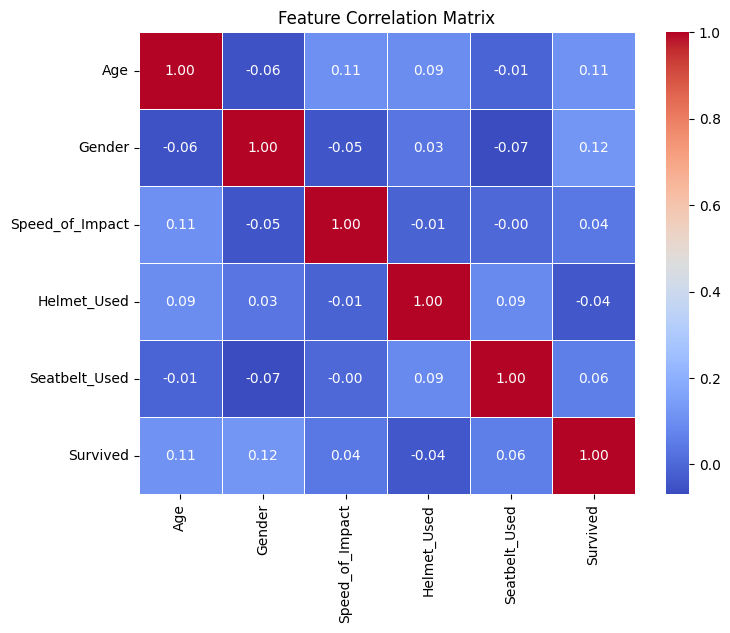

In [27]:
# Check correlation matrix
print("\nCorrelation Matrix:\n", df.corr())

correlation_matrix = df.corr()
# Display dataset after feature selection
print("\nFinal Processed Dataset:\n", df.head())

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [28]:
# Display final dataset info
print("\nFinal Dataset Info:")
df.info()



Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    float64
 1   Gender           200 non-null    int64  
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    int64  
 4   Seatbelt_Used    200 non-null    int64  
 5   Survived         200 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.5 KB
